In [ ]:
# 🧠 ResNet18 기반 Binary Classification (Accuracy + Precision + Recall + F1 출력)

import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import classification_report

# ✅ 1. 경로 & 장치 설정
data_dir = '/content/drive/MyDrive/split_dataset'  # train/, test/ 포함된 폴더
train_dir = os.path.join(data_dir, 'train')
test_dir  = os.path.join(data_dir, 'test')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 2. 전처리 + 데이터 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data  = datasets.ImageFolder(test_dir, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"✔️ 학습 데이터 수: {len(train_data)}, 테스트 데이터 수: {len(test_data)}")
print(f"✔️ 클래스 매핑: {train_data.class_to_idx}")  # 예: {'defect': 0, 'no_defect': 1}

# ✅ 3. 모델 정의 (ResNet18 + 1 output)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)  # binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ✅ 4. 학습 함수
def train_one_epoch(model, loader):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(loader):
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        total_loss += loss.item()

    acc = correct / total
    print(f"📘 Train Loss: {total_loss:.4f} | Acc: {acc:.4f}")


# ✅ 5. 평가 함수 (정확도 + 정밀도 + 재현율 + F1)
def evaluate_metrics(model, loader, tag='Test'):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = (torch.sigmoid(outputs) > 0.5).int().squeeze(1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print(f"\n📊 {tag} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['defect', 'no_defect']))

# ✅ 6. 학습 루프 + 테스트
for epoch in range(10):
    print(f"\n🔁 Epoch {epoch+1}")
    train_one_epoch(model, train_loader)
    evaluate_metrics(model, test_loader, tag="Test")

# ✅ 7. 모델 저장 (선택)
torch.save(model.state_dict(), '/content/drive/MyDrive/resnet18_base_20.pt')


✔️ 학습 데이터 수: 1778, 테스트 데이터 수: 764
✔️ 클래스 매핑: {'defect': 0, 'no_defect': 1}


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 230MB/s]



🔁 Epoch 1
📘 Train Loss: 37.2052 | Acc: 0.6012

📊 Test Classification Report:
              precision    recall  f1-score   support

      defect       0.62      0.62      0.62       331
   no_defect       0.71      0.70      0.71       433

    accuracy                           0.67       764
   macro avg       0.66      0.66      0.66       764
weighted avg       0.67      0.67      0.67       764


🔁 Epoch 2
📘 Train Loss: 28.3942 | Acc: 0.6839

📊 Test Classification Report:
              precision    recall  f1-score   support

      defect       0.63      0.69      0.66       331
   no_defect       0.75      0.69      0.72       433

    accuracy                           0.69       764
   macro avg       0.69      0.69      0.69       764
weighted avg       0.70      0.69      0.69       764


🔁 Epoch 3
📘 Train Loss: 24.8561 | Acc: 0.7222

📊 Test Classification Report:
              precision    recall  f1-score   support

      defect       0.71      0.55      0.62       331
   

In [ ]:
# 🧠 ResNet18 기반 Binary Classification (Accuracy + Precision + Recall + F1 출력)

import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import classification_report

# ✅ 1. 경로 & 장치 설정
data_dir = '/content/drive/MyDrive/split_dataset_aug'  # train/, test/ 포함된 폴더
train_dir = os.path.join(data_dir, 'train')
test_dir  = os.path.join(data_dir, 'test')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 2. 전처리 + 데이터 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data  = datasets.ImageFolder(test_dir, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"✔️ 학습 데이터 수: {len(train_data)}, 테스트 데이터 수: {len(test_data)}")
print(f"✔️ 클래스 매핑: {train_data.class_to_idx}")  # 예: {'defect': 0, 'no_defect': 1}

# ✅ 3. 모델 정의 (ResNet18 + 1 output)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)  # binary classification
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ✅ 4. 학습 함수
def train_one_epoch(model, loader):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(loader):
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        total_loss += loss.item()

    acc = correct / total
    print(f"📘 Train Loss: {total_loss:.4f} | Acc: {acc:.4f}")


# ✅ 5. 평가 함수 (정확도 + 정밀도 + 재현율 + F1)
def evaluate_metrics(model, loader, tag='Test'):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = (torch.sigmoid(outputs) > 0.5).int().squeeze(1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print(f"\n📊 {tag} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['defect', 'no_defect']))

# ✅ 6. 학습 루프 + 테스트
for epoch in range(10):
    print(f"\n🔁 Epoch {epoch+1}")
    train_one_epoch(model, train_loader)
    evaluate_metrics(model, test_loader, tag="Test")

# ✅ 7. 모델 저장 (선택)
torch.save(model.state_dict(), '/content/drive/MyDrive/resnet18_aug_20.pt')


✔️ 학습 데이터 수: 2643, 테스트 데이터 수: 764
✔️ 클래스 매핑: {'defect': 0, 'no_defect': 1}

🔁 Epoch 1
📘 Train Loss: 45.6027 | Acc: 0.7000

📊 Test Classification Report:
              precision    recall  f1-score   support

      defect       0.57      0.61      0.59       331
   no_defect       0.68      0.64      0.66       433

    accuracy                           0.63       764
   macro avg       0.62      0.63      0.62       764
weighted avg       0.63      0.63      0.63       764


🔁 Epoch 2
📘 Train Loss: 32.2683 | Acc: 0.7855

📊 Test Classification Report:
              precision    recall  f1-score   support

      defect       0.66      0.68      0.67       331
   no_defect       0.75      0.73      0.74       433

    accuracy                           0.71       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.71      0.71      0.71       764


🔁 Epoch 3
📘 Train Loss: 27.0745 | Acc: 0.8282

📊 Test Classification Report:
              precision    recall  f1

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import classification_report

# ✅ 1. 경로 & 장치 설정
data_dir = '/content/drive/MyDrive/split_dataset'  # train/, test/ 포함된 폴더
train_dir = os.path.join(data_dir, 'train')
test_dir  = os.path.join(data_dir, 'test')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 2. 전처리 + 데이터 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

#train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data  = datasets.ImageFolder(test_dir, transform=transform)
#train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

# 모델 로드
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18_base.pt'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        y_scores.extend(probs)
        y_true.extend(labels.numpy())

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


KeyboardInterrupt: 


🚀 ROC Curve 계산 시작 (총 24 배치)

  🔄 배치 1/24 처리 중...
  🔄 배치 2/24 처리 중...
  🔄 배치 3/24 처리 중...
  🔄 배치 4/24 처리 중...
  🔄 배치 5/24 처리 중...
  🔄 배치 6/24 처리 중...
  🔄 배치 7/24 처리 중...
  🔄 배치 8/24 처리 중...
  🔄 배치 9/24 처리 중...
  🔄 배치 10/24 처리 중...
  🔄 배치 11/24 처리 중...
  🔄 배치 12/24 처리 중...
  🔄 배치 13/24 처리 중...
  🔄 배치 14/24 처리 중...
  🔄 배치 15/24 처리 중...
  🔄 배치 16/24 처리 중...
  🔄 배치 17/24 처리 중...
  🔄 배치 18/24 처리 중...
  🔄 배치 19/24 처리 중...
  🔄 배치 20/24 처리 중...
  🔄 배치 21/24 처리 중...
  🔄 배치 22/24 처리 중...
  🔄 배치 23/24 처리 중...
  🔄 배치 24/24 처리 중...


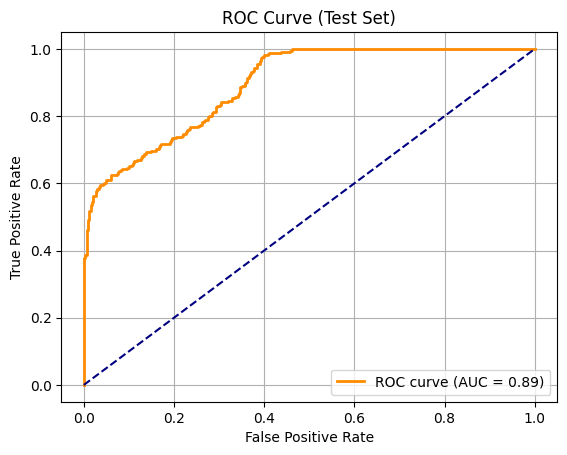

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ 경로 & 장치 설정
data_dir = '/content/drive/MyDrive/split_dataset'
test_dir = os.path.join(data_dir, 'test')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ 테스트 데이터 로딩
test_data = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ 모델 로드
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18_base.pt'))
model = model.to(device)
model.eval()

# ✅ ROC 계산용 예측 수행 (진행 상황 출력)
y_true = []
y_scores = []

print(f"\n🚀 ROC Curve 계산 시작 (총 {len(test_loader)} 배치)\n")

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"  🔄 배치 {batch_idx + 1}/{len(test_loader)} 처리 중...")

        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        y_scores.extend(probs)
        y_true.extend(labels.numpy())

# ✅ ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# ✅ 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid()
plt.show()



🚀 ROC Curve 계산 시작 (총 24 배치)

  🔄 배치 1/24 처리 중...
  🔄 배치 2/24 처리 중...
  🔄 배치 3/24 처리 중...
  🔄 배치 4/24 처리 중...
  🔄 배치 5/24 처리 중...
  🔄 배치 6/24 처리 중...
  🔄 배치 7/24 처리 중...
  🔄 배치 8/24 처리 중...
  🔄 배치 9/24 처리 중...
  🔄 배치 10/24 처리 중...
  🔄 배치 11/24 처리 중...
  🔄 배치 12/24 처리 중...
  🔄 배치 13/24 처리 중...
  🔄 배치 14/24 처리 중...
  🔄 배치 15/24 처리 중...
  🔄 배치 16/24 처리 중...
  🔄 배치 17/24 처리 중...
  🔄 배치 18/24 처리 중...
  🔄 배치 19/24 처리 중...
  🔄 배치 20/24 처리 중...
  🔄 배치 21/24 처리 중...
  🔄 배치 22/24 처리 중...
  🔄 배치 23/24 처리 중...
  🔄 배치 24/24 처리 중...


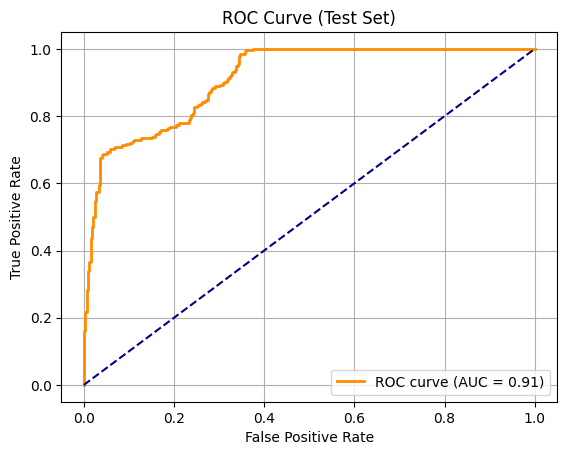

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ 경로 & 장치 설정
data_dir = '/content/drive/MyDrive/split_dataset'
test_dir = os.path.join(data_dir, 'test')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ 테스트 데이터 로딩
test_data = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ 모델 로드
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18_aug.pt'))
model = model.to(device)
model.eval()

# ✅ ROC 계산용 예측 수행 (진행 상황 출력)
y_true = []
y_scores = []

print(f"\n🚀 ROC Curve 계산 시작 (총 {len(test_loader)} 배치)\n")

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"  🔄 배치 {batch_idx + 1}/{len(test_loader)} 처리 중...")

        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        y_scores.extend(probs)
        y_true.extend(labels.numpy())

# ✅ ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# ✅ 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 255MB/s]



🚀 Precision-Recall Curve 계산 시작 (총 24 배치)

  🔄 배치 1/24 처리 중...
  🔄 배치 2/24 처리 중...
  🔄 배치 3/24 처리 중...
  🔄 배치 4/24 처리 중...
  🔄 배치 5/24 처리 중...
  🔄 배치 6/24 처리 중...
  🔄 배치 7/24 처리 중...
  🔄 배치 8/24 처리 중...
  🔄 배치 9/24 처리 중...
  🔄 배치 10/24 처리 중...
  🔄 배치 11/24 처리 중...
  🔄 배치 12/24 처리 중...
  🔄 배치 13/24 처리 중...
  🔄 배치 14/24 처리 중...
  🔄 배치 15/24 처리 중...
  🔄 배치 16/24 처리 중...
  🔄 배치 17/24 처리 중...
  🔄 배치 18/24 처리 중...
  🔄 배치 19/24 처리 중...
  🔄 배치 20/24 처리 중...
  🔄 배치 21/24 처리 중...
  🔄 배치 22/24 처리 중...
  🔄 배치 23/24 처리 중...
  🔄 배치 24/24 처리 중...


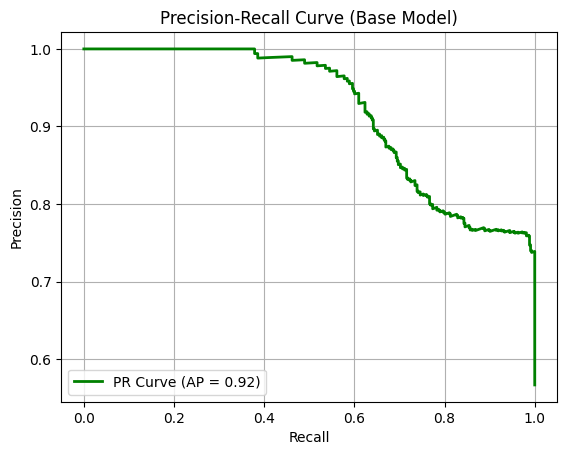

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ✅ 1. 장치 및 경로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = '/content/drive/MyDrive/split_dataset'
test_dir = os.path.join(data_dir, 'test')
model_path = '/content/drive/MyDrive/resnet18_base.pt'

# ✅ 2. 전처리 및 데이터 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ✅ 3. 모델 불러오기
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# ✅ 4. 테스트셋 예측 (확률 및 정답 수집)
y_true = []
y_scores = []

print(f"\n🚀 Precision-Recall Curve 계산 시작 (총 {len(test_loader)} 배치)\n")

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"  🔄 배치 {batch_idx + 1}/{len(test_loader)} 처리 중...")

        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        y_scores.extend(probs)
        y_true.extend(labels.numpy())

# ✅ 5. Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
ap_score = average_precision_score(y_true, y_scores)

# ✅ 6. 시각화
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Base Model)')
plt.legend(loc='lower left')
plt.grid()
plt.show()



🚀 Precision-Recall Curve 계산 시작 (총 24 배치)

  🔄 배치 1/24 처리 중...
  🔄 배치 2/24 처리 중...
  🔄 배치 3/24 처리 중...
  🔄 배치 4/24 처리 중...
  🔄 배치 5/24 처리 중...
  🔄 배치 6/24 처리 중...
  🔄 배치 7/24 처리 중...
  🔄 배치 8/24 처리 중...
  🔄 배치 9/24 처리 중...
  🔄 배치 10/24 처리 중...
  🔄 배치 11/24 처리 중...
  🔄 배치 12/24 처리 중...
  🔄 배치 13/24 처리 중...
  🔄 배치 14/24 처리 중...
  🔄 배치 15/24 처리 중...
  🔄 배치 16/24 처리 중...
  🔄 배치 17/24 처리 중...
  🔄 배치 18/24 처리 중...
  🔄 배치 19/24 처리 중...
  🔄 배치 20/24 처리 중...
  🔄 배치 21/24 처리 중...
  🔄 배치 22/24 처리 중...
  🔄 배치 23/24 처리 중...
  🔄 배치 24/24 처리 중...


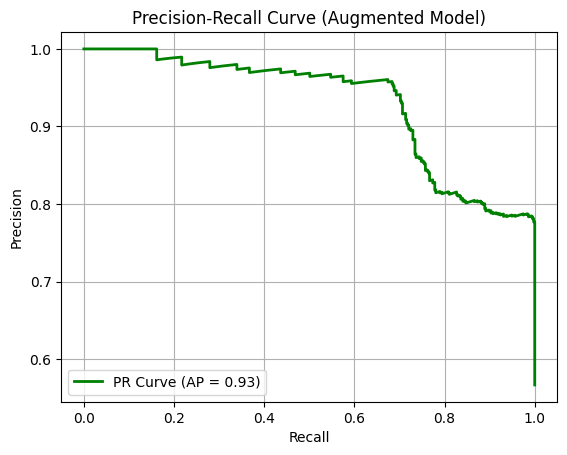

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ✅ 1. 장치 및 경로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = '/content/drive/MyDrive/split_dataset'
test_dir = os.path.join(data_dir, 'test')
model_path = '/content/drive/MyDrive/resnet18_aug.pt'

# ✅ 2. 전처리 및 데이터 로딩
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ✅ 3. 모델 불러오기
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# ✅ 4. 테스트셋 예측 (확률 및 정답 수집)
y_true = []
y_scores = []

print(f"\n🚀 Precision-Recall Curve 계산 시작 (총 {len(test_loader)} 배치)\n")

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"  🔄 배치 {batch_idx + 1}/{len(test_loader)} 처리 중...")

        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        y_scores.extend(probs)
        y_true.extend(labels.numpy())

# ✅ 5. Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
ap_score = average_precision_score(y_true, y_scores)

# ✅ 6. 시각화
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Augmented Model)')
plt.legend(loc='lower left')
plt.grid()
plt.show()
